In [60]:
!pip install tensorflow

In [61]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
data =  pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [64]:
#divide the dataset into dependent and independent features
x = data.iloc[:, 3:13]
y =  data.iloc[:, 13]

In [65]:
#feature engineering
geography = pd.get_dummies(x['Geography'], drop_first= True, dtype=int)
gender = pd.get_dummies(x['Gender'], drop_first=True, dtype=int)

In [66]:
## get concatenate this variable with dataframe
x = x.drop(['Geography', 'Gender'], axis = 1)

In [67]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [68]:
x = pd.concat([x, geography, gender], axis = 1)

In [69]:
#splitting the dataset into train and test data
from sklearn.model_selection import train_test_split

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
sc =  StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test) # Corrected: transform x_test instead of x_train again

In [73]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [74]:
y_test

,Exited
9394,0
898,1
2398,0
5906,0
2343,0
...,...
1037,0
2899,0
9549,0
2740,0


In [75]:
## lets build the ANN

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU, LeakyReLU, ELU, PReLU
from tensorflow.keras.layers import Dropout

In [77]:
#intialze the ANN
classifier  =  Sequential()


In [78]:
x_train.shape

(8000, 11)

In [79]:
#input Layer
classifier.add(Dense(units=11, activation='relu'))

In [80]:
#hidden layer1
classifier.add(Dense(units=7, activation='relu'))

In [81]:
#hidden layer2
classifier.add(Dense(units=6, activation='relu'))

In [82]:
#output layer
classifier.add(Dense(units=1, activation='sigmoid'))

In [83]:
classifier.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

In [84]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [85]:
model = classifier.fit(x_train, y_train, validation_split=0.33,batch_size=10, epochs=100, callbacks=early_stopping )

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7716 - loss: 0.5403 - val_accuracy: 0.8152 - val_loss: 0.4483
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8260 - loss: 0.4243 - val_accuracy: 0.8270 - val_loss: 0.4066
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8424 - loss: 0.3847 - val_accuracy: 0.8391 - val_loss: 0.3863
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8510 - loss: 0.3656 - val_accuracy: 0.8379 - val_loss: 0.3814
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8560 - loss: 0.3475 - val_accuracy: 0.8398 - val_loss: 0.3736
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8597 - loss: 0.3483 - val_accuracy: 0.8440 - val_loss: 0.3760
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8615 - loss: 0.3379 - val_accuracy: 0.8429 - val_loss: 0.3705
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8703 - loss: 0.3315 - val_accu

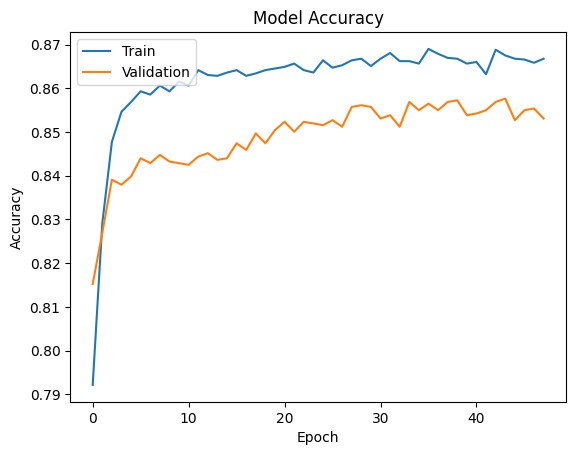

In [86]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

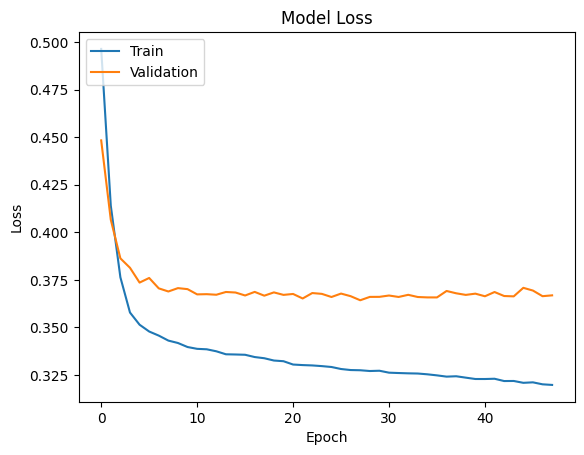

In [87]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [88]:
#predicting the test result
y_preds = classifier.predict(x_test)
y_preds = (y_preds >=  0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [89]:
from sklearn.metrics import confusion_matrix
cm  = confusion_matrix(y_test, y_preds)
cm

array([[1518,   77],
       [ 200,  205]])

In [90]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_preds, y_test)

In [91]:
score

0.8615